# Import Required Libraries

In [2]:
# STEP 1: Import Required Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create SQLite Database and connect

In [3]:
# STEP 2: Create SQLite Database and connect
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create Sales Table

In [4]:
# STEP 3: Create Sales Table
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
CREATE TABLE sales (
    sale_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    customer_region TEXT,
    product_name TEXT,
    category TEXT,
    quantity INTEGER,
    price_per_unit REAL,
    discount REAL,
    sale_date TEXT,
    payment_method TEXT
)
""")

# Sample Data

In [5]:
# STEP 4: Sample Data
sample_data = [
    (1, 101, 'North', 'Laptop', 'Electronics', 2, 750.0, 10, '2024-01-15', 'Credit Card'),
    (2, 102, 'West', 'Smartphone', 'Electronics', 5, 300.0, 5, '2024-01-16', 'Cash'),
    (3, 103, 'South', 'Tablet', 'Electronics', 3, 200.0, 15, '2024-01-17', 'Credit Card'),
    (4, 104, 'East', 'Office Chair', 'Furniture', 4, 120.0, 10, '2024-01-18', 'Debit Card'),
    (5, 105, 'North', 'Desk', 'Furniture', 1, 250.0, 0, '2024-01-19', 'UPI'),
    (6, 106, 'West', 'Printer', 'Electronics', 2, 180.0, 5, '2024-01-20', 'Credit Card'),
    (7, 107, 'South', 'Monitor', 'Electronics', 3, 220.0, 0, '2024-01-21', 'Cash'),
    (8, 108, 'East', 'Bookshelf', 'Furniture', 1, 150.0, 10, '2024-01-22', 'Credit Card'),
    (9, 109, 'North', 'Pen Set', 'Stationery', 10, 5.0, 0, '2024-01-23', 'UPI'),
    (10, 110, 'West', 'Notebook', 'Stationery', 20, 3.0, 0, '2024-01-24', 'Credit Card'),
    (11, 111, 'South', 'Desk Lamp', 'Electronics', 5, 35.0, 20, '2024-01-25', 'Debit Card'),
    (12, 112, 'East', 'Whiteboard', 'Furniture', 2, 90.0, 10, '2024-01-26', 'Credit Card'),
    (13, 113, 'North', 'Mouse', 'Electronics', 4, 25.0, 5, '2024-01-27', 'Cash'),
    (14, 114, 'West', 'Keyboard', 'Electronics', 4, 45.0, 10, '2024-01-28', 'Credit Card'),
    (15, 115, 'South', 'Filing Cabinet', 'Furniture', 1, 180.0, 15, '2024-01-29', 'UPI'),
    (16, 116, 'East', 'Water Bottle', 'Stationery', 6, 8.0, 0, '2024-01-30', 'Cash'),
    (17, 117, 'North', 'Sticky Notes', 'Stationery', 15, 1.5, 0, '2024-02-01', 'Credit Card'),
    (18, 118, 'West', 'Chairs', 'Furniture', 3, 100.0, 5, '2024-02-02', 'Debit Card'),
    (19, 119, 'South', 'Scissors', 'Stationery', 5, 3.5, 0, '2024-02-03', 'Credit Card'),
    (20, 120, 'East', 'Pen Drive', 'Electronics', 10, 20.0, 10, '2024-02-04', 'UPI'),
    (21, 121, 'North', 'Stapler', 'Stationery', 7, 6.0, 0, '2024-02-05', 'Cash'),
    (22, 122, 'West', 'Smartphone', 'Electronics', 3, 300.0, 10, '2024-02-06', 'Credit Card'),
    (23, 123, 'South', 'Desk Organizer', 'Stationery', 4, 15.0, 0, '2024-02-07', 'UPI'),
    (24, 124, 'East', 'Bookshelf', 'Furniture', 2, 150.0, 5, '2024-02-08', 'Debit Card'),
    (25, 125, 'North', 'Tablet', 'Electronics', 2, 200.0, 5, '2024-02-09', 'Cash'),
    (26, 126, 'West', 'Notebook', 'Stationery', 25, 3.0, 0, '2024-02-10', 'Credit Card'),
    (27, 127, 'South', 'Monitor', 'Electronics', 2, 220.0, 10, '2024-02-11', 'Credit Card'),
    (28, 128, 'East', 'Desk', 'Furniture', 1, 250.0, 0, '2024-02-12', 'UPI'),
    (29, 129, 'North', 'Pen Set', 'Stationery', 8, 5.0, 0, '2024-02-13', 'Credit Card'),
    (30, 130, 'West', 'Water Bottle', 'Stationery', 10, 8.0, 5, '2024-02-14', 'Debit Card')
]

# Populate or Insert Data in Sales Table

In [6]:
# STEP 5: Populate or Insert Data in Sales Table
cursor.executemany("""
    INSERT INTO sales (
        sale_id, customer_id, customer_region, product_name, category,
        quantity, price_per_unit, discount, sale_date, payment_method
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
""", sample_data)

conn.commit()

# Analyses with SQL Queries and Insights

# 1. Total Revenue by Category

In [7]:
# 1. Total Revenue by Category
query1 = """
SELECT category,
       SUM(quantity * price_per_unit * (1 - discount / 100.0)) AS total_revenue
FROM sales
GROUP BY category;
"""
df_category_revenue = pd.read_sql_query(query1, conn)

# Barplot for Total Revenue by Category

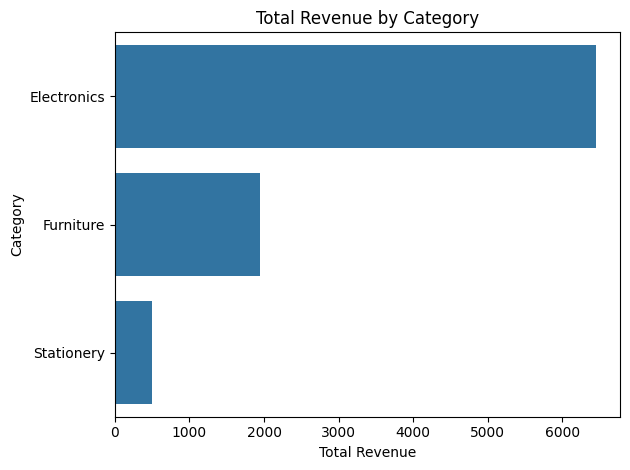

In [8]:
# Barplot for Total Revenue by Category
sns.barplot(x='total_revenue', y='category', data=df_category_revenue.sort_values('total_revenue', ascending=False))
plt.title('Total Revenue by Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

📈 Insight- The Barplot shows that **Electronics generates the highest revenue**, indicating it’s the strongest performing category. **Furniture contributes moderately**, while **Stationery has the lowest revenue**, suggesting lower sales or pricing. This highlights an opportunity to invest more in Electronics and evaluate the performance of Stationery for potential improvements.

# 2. Daily Revenue Over Time

In [9]:
# 2. Daily Revenue Over Time
query2 = """
SELECT sale_date,
       SUM(quantity * price_per_unit * (1 - discount / 100.0)) AS daily_revenue
FROM sales
GROUP BY sale_date
ORDER BY sale_date;
"""
df_daily_revenue = pd.read_sql_query(query2, conn)

# Lineplot for Daily Revenue Over Time

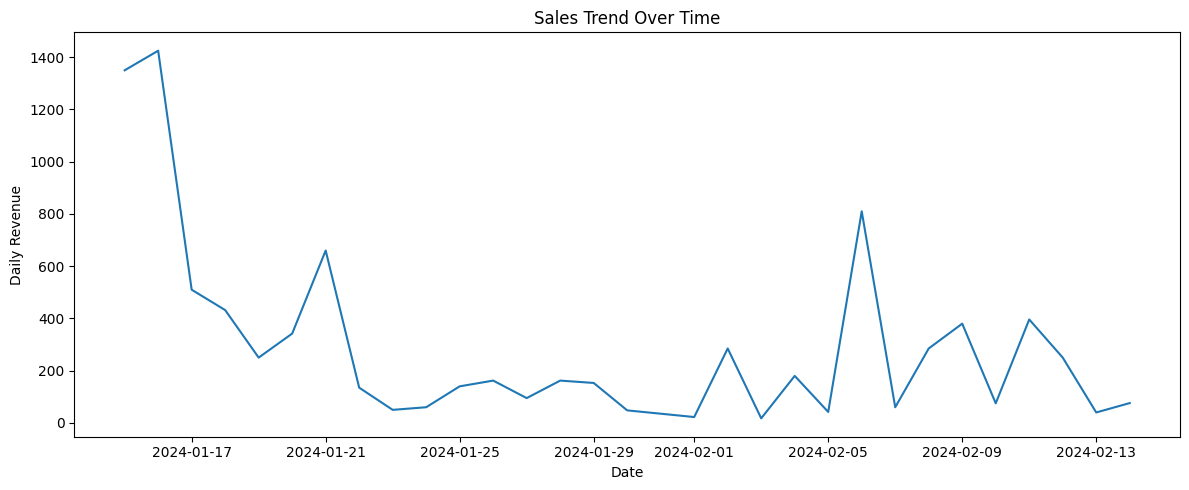

In [10]:
# Lineplot for Daily Revenue Over Time
df_daily_revenue['sale_date'] = pd.to_datetime(df_daily_revenue['sale_date'])

plt.figure(figsize=(12, 5))
sns.lineplot(x='sale_date', y='daily_revenue', data=df_daily_revenue)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Revenue')
plt.tight_layout()
plt.show()

📈 Insight- The sales trend in the graph shows a sharp decline in revenue from January 17, followed by fluctuations with intermittent peaks and troughs. This indicates instability in daily sales, possibly influenced by market dynamics, seasonal variations, or external factors. Identifying key causes behind the dips and surges could help optimize sales strategies for better consistency.

# 3. Top Selling Products by Quantity

In [11]:
# 3. Top Selling Products by Quantity
query3 = """
SELECT product_name, SUM(quantity) AS total_quantity
FROM sales
GROUP BY product_name
ORDER BY total_quantity DESC
LIMIT 10;
"""
df_top_products = pd.read_sql_query(query3, conn)

# Barplot for Top Products by Quantity

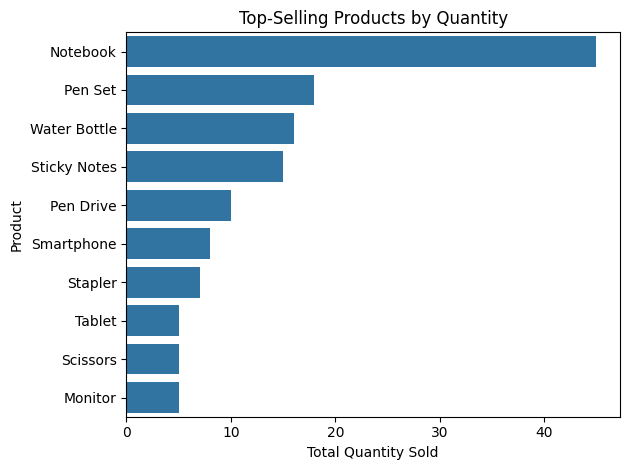

In [12]:
# Barplot for Top Products by Quantity
sns.barplot(x='total_quantity', y='product_name', data=df_top_products.sort_values('total_quantity', ascending=False))
plt.title('Top-Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

📈 Insight- The Barplot highlights the top-selling products by quantity, with **Notebook leading in sales**, followed by **Pen Set, Water Bottle, and Sticky Notes**. In contrast, **Tablet, Scissors, and Monitor** show the lowest sales, indicating lower demand. This suggests an opportunity to focus on promoting the less popular items while leveraging strong-performing products for continued success.

# 4. Discount Trends by Category

In [13]:
# 4. Discount Trends by Category
query4 = """
SELECT category, AVG(discount) AS avg_discount
FROM sales
GROUP BY category;
"""
df_discount_by_category = pd.read_sql_query(query4, conn)

# Barplot for Discount Trends by Category

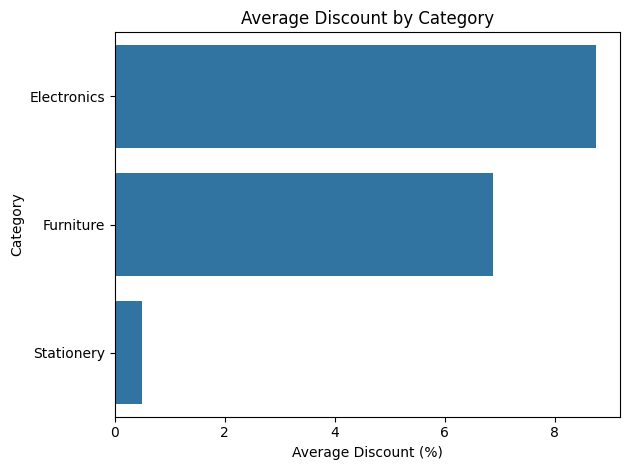

In [14]:
# Barplot for Discount Trends by Category
sns.barplot(x='avg_discount', y='category', data=df_discount_by_category.sort_values('avg_discount', ascending=False))
plt.title('Average Discount by Category')
plt.xlabel('Average Discount (%)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

📈 Insight- The Barplot shows the **average discount given by product category**. Electronics receives the highest average discount, followed by Furniture, while Stationery has a minimal average discount. This suggests that discount strategies are more aggressively applied to high-value or competitive segments like Electronics and Furniture to boost sales or clear inventory.

# 5. Regional Buying Behaviour

In [15]:
# 5. Regional Buying Behaviour
query5 = """
SELECT customer_region, category, SUM(quantity) AS total_quantity
FROM sales
GROUP BY customer_region, category
ORDER BY customer_region;
"""
df_regional_behavior = pd.read_sql_query(query5, conn)

# Heatmap for Regional Buying Behaviour

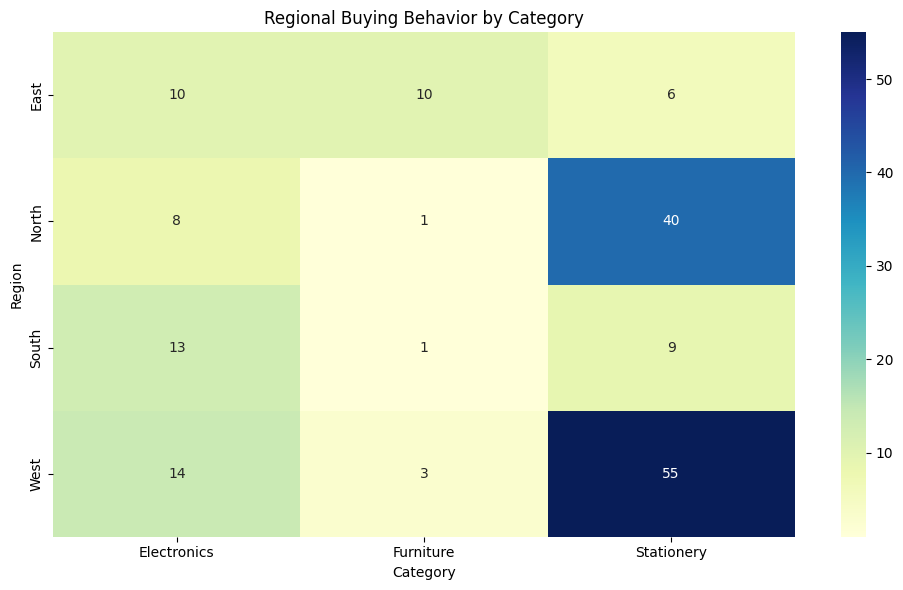

In [16]:
# Heatmap for Regional Buying Behaviour
pivot = df_regional_behavior.pivot(index = 'customer_region', columns = 'category',values = 'total_quantity')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Regional Buying Behavior by Category')
plt.xlabel('Category')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

📈 Insight - The heatmap shows **regional buying behavior by product category**. The **West region** has the highest demand for **Stationery**, while **Electronics** sell steadily across all regions, especially in the **West and South**. **Furniture** sees relatively low demand overall, with a slightly better performance in the **East**. This suggests targeted inventory and marketing strategies by region could improve sales.

# 6. Profitability by Products

In [17]:
# 6. Profitability by Products
query6 = """
SELECT
  product_name,
  SUM(quantity * price_per_unit * 0.3 * (1 - discount / 100.0)) AS estimated_profit
FROM sales
GROUP BY product_name
ORDER BY estimated_profit DESC;
"""
df_profitability = pd.read_sql_query(query6, conn)

# Barplot for Profitability by Products

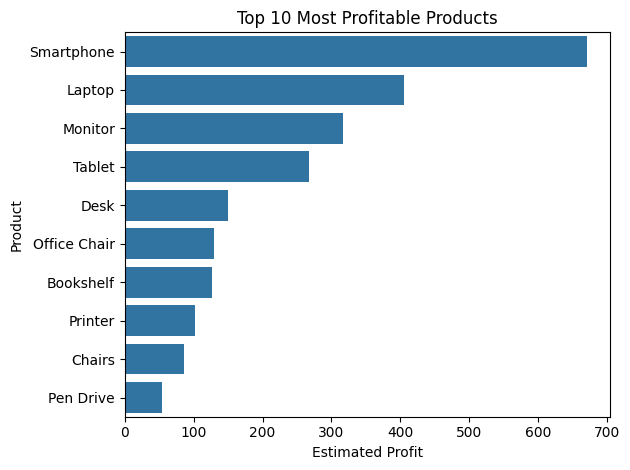

In [18]:
# Barplot for Profitability by Products
sns.barplot(x='estimated_profit', y='product_name', data=df_profitability.sort_values('estimated_profit', ascending=False).head(10))
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Estimated Profit')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

📈 Insight - The bar chart shows that **Smartphones and Laptops** are the most profitable products, significantly outperforming others. **Monitors and Tablets** also yield high profits, while items like **Pen Drives and Chairs** contribute the least. This indicates a strong profitability trend in **electronics**, suggesting where investment and marketing should be focused.

# 7. Category Contribution to Total Revenue

In [19]:
# 7. Category Contribution to Total Revenue
query7 = """
WITH total AS (
  SELECT SUM(quantity * price_per_unit * (1 - discount / 100.0)) AS total_revenue
  FROM sales
)
SELECT
  category,
  SUM(quantity * price_per_unit * (1 - discount / 100.0)) AS category_revenue,
  ROUND(100.0 * SUM(quantity * price_per_unit * (1 - discount / 100.0)) / total.total_revenue, 2) AS percent_of_total
FROM sales, total
GROUP BY category;
"""
df_category_contribution = pd.read_sql_query(query7, conn)

# Pie Chart for Category Contribution to Total Revenue

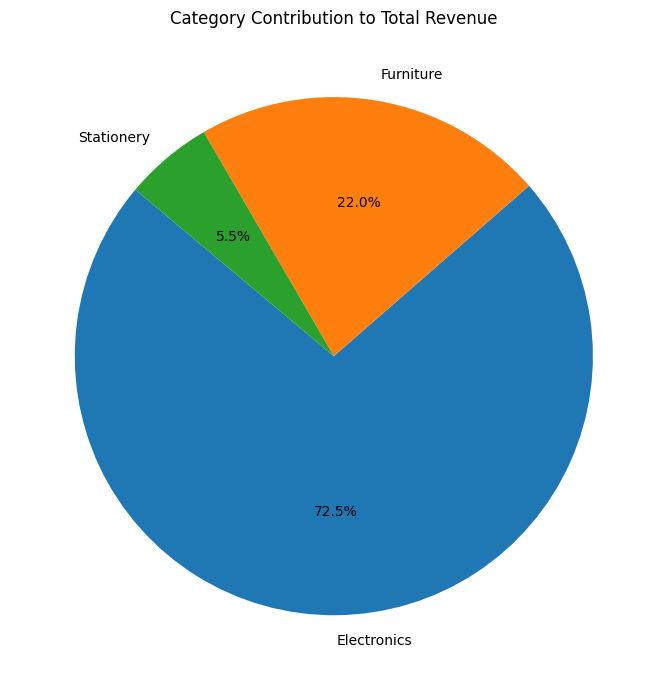

In [20]:
# Pie Chart for Category Contribution to Total Revenue
plt.figure(figsize=(7, 7))
plt.pie(df_category_contribution['percent_of_total'], labels=df_category_contribution['category'], autopct='%1.1f%%', startangle=140)
plt.title('Category Contribution to Total Revenue')
plt.tight_layout()
plt.show()

📈 Insight - The pie chart shows that **Electronics** dominate total revenue, contributing **72.5%**, followed by **Furniture** at **22%**, while **Stationery** lags behind at just **5.5%**. This indicates a strong reliance on electronics for revenue generation, highlighting it as the most lucrative category. Strategic focus on electronics could further enhance overall revenue.

# 8. Anomalies in Discounts or Revenue

In [33]:
# 8. Anomalies in Discounts or Revenue
query8 = """
SELECT * FROM sales
WHERE discount > 10 OR (quantity * price_per_unit * (1 - discount / 100.0)) = 0.01;
"""
df_anomalies = pd.read_sql_query(query8, conn)

# Scatterplot to Highlight anomalies

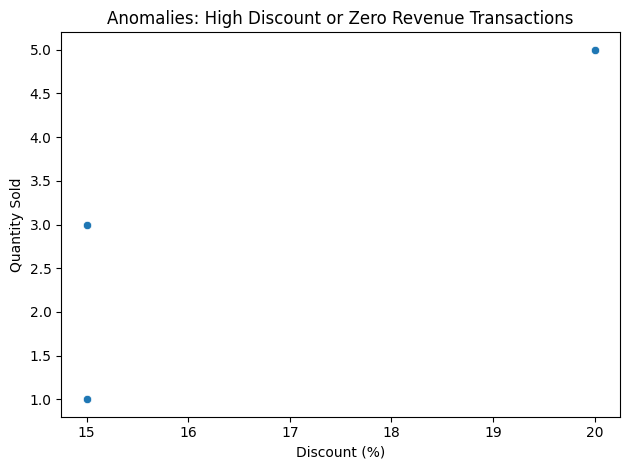

In [34]:
# Scatterplot to Highlight anomalies
sns.scatterplot(data=df_anomalies, x='discount', y='quantity')
plt.title('Anomalies: High Discount or Zero Revenue Transactions')
plt.xlabel('Discount (%)')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

📈 Insight - This scatter plot highlights **anomalous transactions** involving **high discounts (15–20%)** but **zero revenue**. These transactions still recorded **some quantity sold**, suggesting potential pricing or recording errors. Such anomalies may indicate **data quality issues** or **unprofitable sales**, requiring further investigation.

# 9. Customer Lifetime Value

In [35]:
# 9. Customer Lifetime Value
query9 = """
SELECT
  customer_id,
  customer_region,
  SUM(quantity * price_per_unit * (1 - discount / 100.0)) AS lifetime_value
FROM sales
GROUP BY customer_id
ORDER BY lifetime_value DESC
LIMIT 10;
"""
df_ltv = pd.read_sql_query(query9, conn)

# Barplot for Top Customers by Lifetime Value

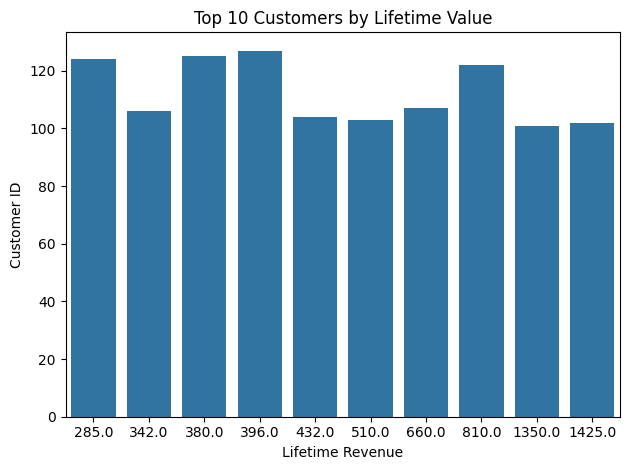

In [36]:
# Barplot for Top Customers by Lifetime Value
sns.barplot(x='lifetime_value', y='customer_id', data=df_ltv.head(10))
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('Lifetime Revenue')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

📈 Insight - This bar chart displays the **top 10 customers ranked by lifetime revenue**. The customer with the highest lifetime value has spent **₹1425**, while others have values ranging from **₹285 to ₹1350**. The top three customers are closely matched in revenue contribution, indicating **a few high-value clients are driving significant business**.

# 10. Repeat Product Sales

In [37]:
# 10. Repeat Product Sales
query10 = """
SELECT product_name, COUNT(DISTINCT customer_id) AS unique_buyers
FROM sales
GROUP BY product_name
ORDER BY unique_buyers DESC;
"""
df_repeat_sales = pd.read_sql_query(query10, conn)

# Barplot for Repeat Product Sales

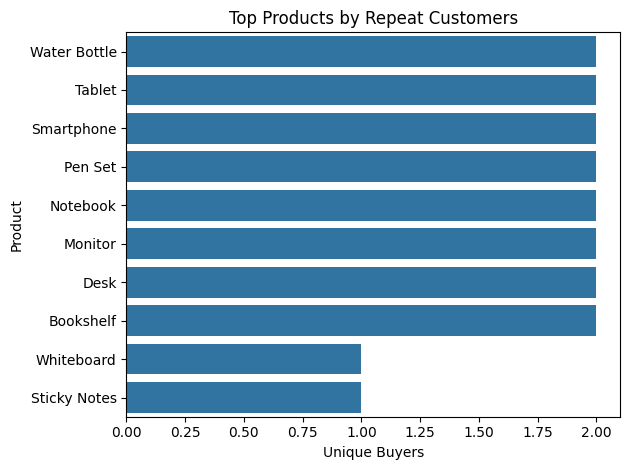

In [38]:
# Barplot for Repeat Product Sales
sns.barplot(x='unique_buyers', y='product_name', data=df_repeat_sales.sort_values('unique_buyers', ascending=False).head(10))
plt.title('Top Products by Repeat Customers')
plt.xlabel('Unique Buyers')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

📈 Insight - This bar chart highlights the **top products purchased by repeat customers**, with items like **Water Bottle, Tablet, Smartphone, and Pen Set** having the highest number of **2 unique repeat buyers each**. Products such as **Whiteboard and Sticky Notes** have only **1 repeat buyer**, suggesting lower retention or niche usage. This insight can guide inventory and loyalty strategies.